<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/exoplanet_trappist1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exoplanet Discovery for TRAPPIST-1 (K2-112 or TIC 278892590)**

In [ ]:
!pip install lightkurve -q
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u

[TRAPPIST-1](https://en.m.wikipedia.org/wiki/TRAPPIST-1) is a cool red dwarf star[c] with seven known exoplanets. It lies in constellation Aquarius 40.66 light-years away from Earth. TRAPPIST-1 is an ultracool M-dwarf star located 38.8 light-years away in the constellation of Aquarius. Also known as K2-112 or TIC 278892590 or EPIC 246199087.

**Search for data**

In [ ]:
# Choose exoplanet system with star
target = 'Trappist-1'
# target = 'Kepler-10'
#target = 'Kepler-8'
#target = 'HR8799'

In [ ]:
# Search for all missions for target exoplanet system (TPF raw data)
pixelfile_info = lk.search_targetpixelfile(target)
pixelfile_info

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,K2 Campaign 12,2016,K2,60,ktwo246199087,0.0
1,K2 Campaign 12,2016,K2,1800,ktwo246199087,0.0
2,K2 Campaign 19,2018,K2,60,ktwo246199087,0.0
3,K2 Campaign 19,2018,K2,1800,ktwo246199087,0.0
4,TESS Sector 70,2023,SPOC,20,278892590,0.0
5,TESS Sector 70,2023,SPOC,120,278892590,0.0
6,TESS Sector 70,2023,TESS-SPOC,200,278892590,0.0


In [ ]:
# Search for specific missions for target exoplanet system (preprocessed Lightcurve data)
search = lk.search_lightcurve(target, mission="TESS")
print(search)

SearchResult containing 3 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 70 2023      SPOC      20   278892590      0.0
  1 TESS Sector 70 2023      SPOC     120   278892590      0.0
  2 TESS Sector 70 2023 TESS-SPOC     200   278892590      0.0


In [ ]:
# Search for specific missions for target exoplanet system (preprocessed Lightcurve data)
search = lk.search_lightcurve(target, mission="K2")
print(search)

SearchResult containing 7 data products.

 #     mission     year  author exptime  target_name  distance
                                   s                   arcsec 
--- -------------- ---- ------- ------- ------------- --------
  0 K2 Campaign 12 2016      K2      60 ktwo246199087      0.0
  1 K2 Campaign 12 2016      K2    1800 ktwo246199087      0.0
  2 K2 Campaign 19 2018      K2      60 ktwo246199087      0.0
  3 K2 Campaign 19 2018      K2    1800 ktwo246199087      0.0
  4 K2 Campaign 12 2016 EVEREST    1800 ktwo246199087      0.0
  5 K2 Campaign 12 2016   K2SFF    1800 ktwo246199087      0.0
  6 K2 Campaign 19 2018   K2SFF    1800 ktwo246199087      0.0


In [ ]:
# Search for specific missions for target exoplanet system (preprocessed Lightcurve data)
search = lk.search_lightcurve(target, mission="Kepler")
print(search)

No data found for target "Trappist-1".
ERROR:lightkurve.search:No data found for target "Trappist-1".


SearchResult containing 0 data products.


**Load raw and preprocessed data**

In [ ]:
# Load lightcurve proprocessed data for target exoplanet system
lightcurve_tess = lk.search_lightcurve(target, mission="TESS").download(quality_bitmask="default")
lightcurve_tess

/usr/local/lib/python3.10/dist-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
3208.3596665387436,———,———,5.6377598e-03,8557488,1943.96386,1433.91159,3.0822385e+02,1.7217247e+01,3.7563928e+03,7.4894805e+00,———,———,1000000000000,———,———,———,———,1943.96386,3.1980935e-02,1433.91159,3.2440271e-02,-3.6276292e-02,8.3381988e-02
3208.359898016394,———,———,5.6377561e-03,8557489,1943.92337,1433.88600,2.8560583e+02,1.7153227e+01,3.7478950e+03,7.4724865e+00,———,———,1000000000000,———,———,———,———,1943.92337,3.4511648e-02,1433.88600,3.5155877e-02,-5.6731515e-02,9.4888985e-02
3208.360129494043,———,———,5.6377524e-03,8557490,1943.96226,1433.86425,2.7870850e+02,1.7161091e+01,3.7533420e+03,7.4690461e+00,———,———,1000000000000,———,———,———,———,1943.96226,3.5175122e-02,1433.86425,3.6313698e-02,-4.2220205e-02,9.2989884e-02
3208.360360972158,———,———,5.6377491e-03,8557491,1943.97004,1433.92637,2.9815787e+02,1.7171343e+01,3.7455110e+03,7.4720464e+00,———,———,1000000000000,———,———,———,———,1943.97004,3.2877222e-02,1433.92637,3.3382270e-02,-2.8920442e-02,7.1770385e-02
3208.360592449807,———,———,5.6377454e-03,8557492,1943.92305,1433.94753,3.1427707e+02,1.7190376e+01,3.7447053e+03,7.4747128e+00,———,———,1000000000000,———,———,———,———,1943.92305,3.1360202e-02,1433.94753,3.1718221e-02,-4.8319425e-02,8.9245722e-02
3208.3608239274563,———,———,5.6377416e-03,8557493,1943.94729,1433.90789,2.9530475e+02,1.7165764e+01,3.7492361e+03,7.4756236e+00,———,———,1000000000000,———,———,———,———,1943.94729,3.3291720e-02,1433.90789,3.3863880e-02,-3.5977259e-02,8.1243254e-02
3208.361055405106,———,———,5.6377379e-03,8557494,1943.92073,1433.90477,2.8738000e+02,1.7146666e+01,3.7316821e+03,7.4604945e+00,———,———,1000000000000,———,———,———,———,1943.92073,3.4310155e-02,1433.90477,3.4759138e-02,-4.4602238e-02,1.0660651e-01
3208.3612868827554,———,———,5.6377342e-03,8557495,1943.95954,1433.96564,3.2776349e+02,1.7190372e+01,3.7376792e+03,7.4541583e+00,———,———,1000000000000,———,———,———,———,1943.95954,2.9995248e-02,1433.96564,3.0287705e-02,-5.0710022e-02,1.0075001e-01


In [ ]:
# Load SPOC data if available
pixelfile_info_tes = pixelfile_info[(pixelfile_info.author == "SPOC") & (pixelfile_info.exptime == 120*u.second)][0].download()
pixelfile_info_tes

TessTargetPixelFile(TICID: 278892590)

In [ ]:
# Load Kepler data if available
pixelfile_info_kep = pixelfile_info[(pixelfile_info.author == "K2") & (pixelfile_info.exptime == 60*u.second)][0].download()
pixelfile_info_kep

KeplerTargetPixelFile Object (ID: 246199087)

In [ ]:
# Load Kepler data if available
pixelfile_info_kep = pixelfile_info[(pixelfile_info.author == "Kepler") & (pixelfile_info.exptime == 60*u.second)][0].download()
pixelfile_info_kep

In [ ]:
# Load TPF raw data for target exoplanet system
pixelfile = lk.search_targetpixelfile(target)[1].download()
pixelfile

KeplerTargetPixelFile Object (ID: 246199087)

**Pixel Visualization from raw TFP file**

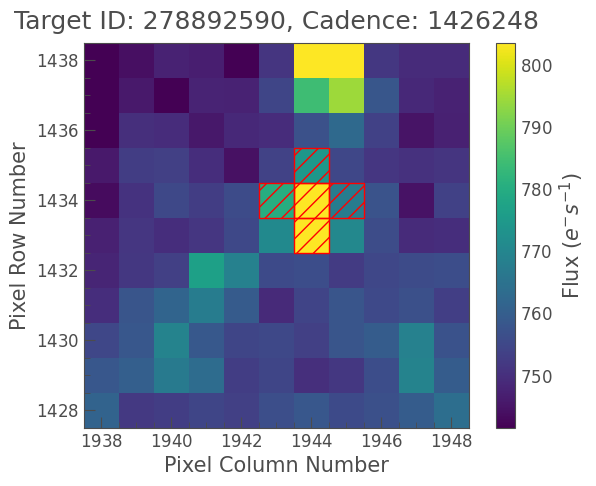

In [ ]:
# Visualize TESS data if available
pixelfile_info_tes.plot(aperture_mask=pixelfile_info_tes.pipeline_mask)
fig = plt.gcf()
fig.set_size_inches(7, 5)
plt.show()

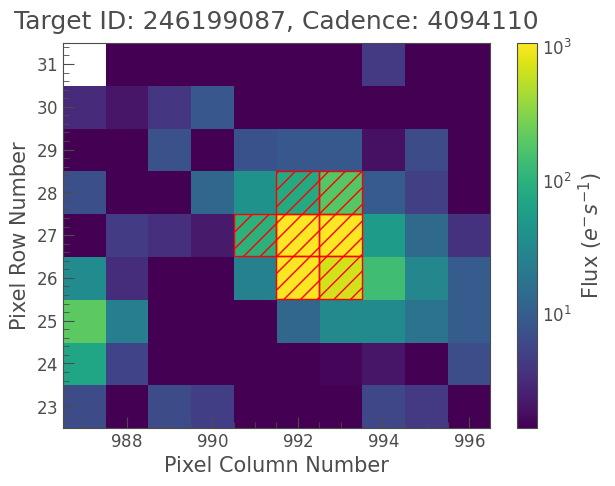

In [ ]:
# Visualize Kepler data if available
pixelfile_info_kep.plot(aperture_mask=pixelfile_info_kep.pipeline_mask, scale='log')
fig = plt.gcf()
fig.set_size_inches(7, 5)
plt.show()

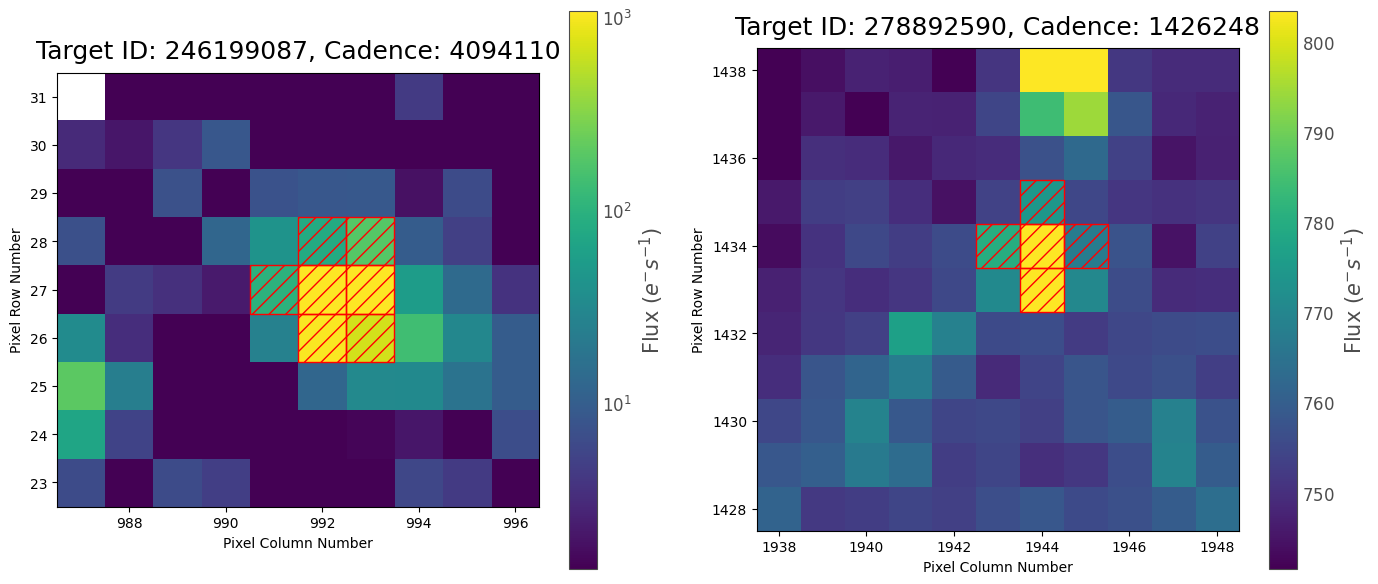

In [ ]:
# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14,6))
pixelfile_info_kep.plot(ax=axes[0], aperture_mask=pixelfile_info_kep.pipeline_mask, scale='log')
pixelfile_info_tes.plot(ax=axes[1], aperture_mask=pixelfile_info_tes.pipeline_mask)
fig.tight_layout();

In [ ]:
# Visualize how the target star's brightness evolves over time (Animate Exoplanet Movement)
pixelfile.animate()

<Axes: title={'center': 'Visualize Trappist-1'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

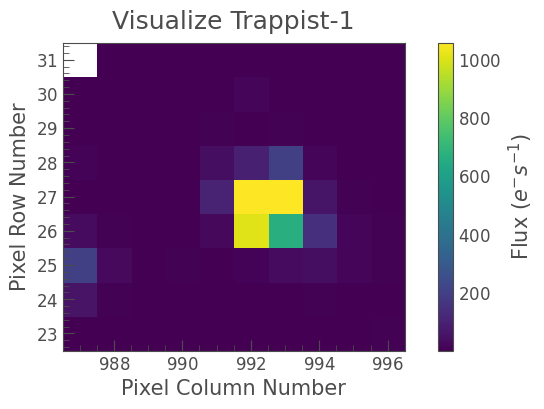

In [ ]:
# Visualize pixelfile data
pixelfile.plot(title=f"Visualize {target}")

**Transit fitting, period finding, and light curve analysis** (EPIC 246199087 means that this data is from K2)


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

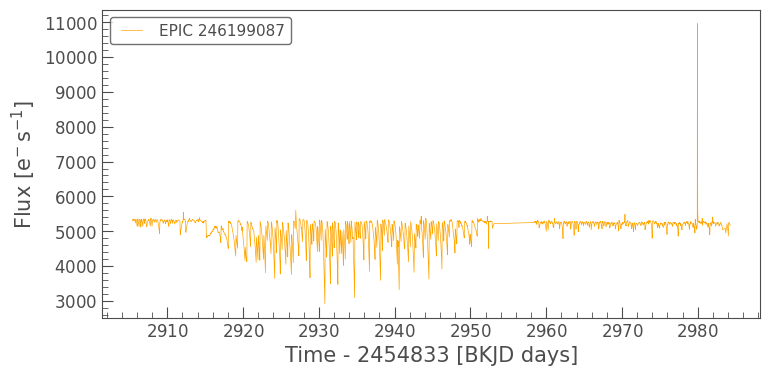

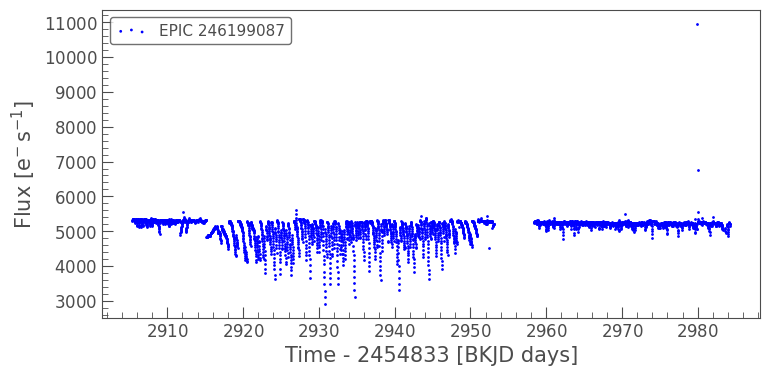

In [ ]:
# Create lightcurve from raw data
pixelfile.to_lightcurve().plot(color='orange')
pixelfile.to_lightcurve().scatter(color='blue')

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

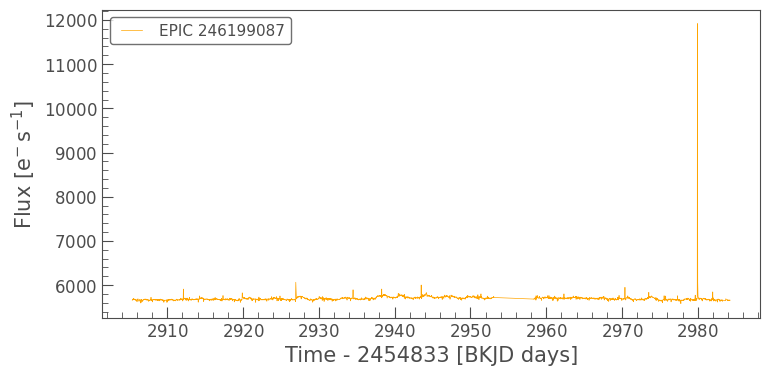

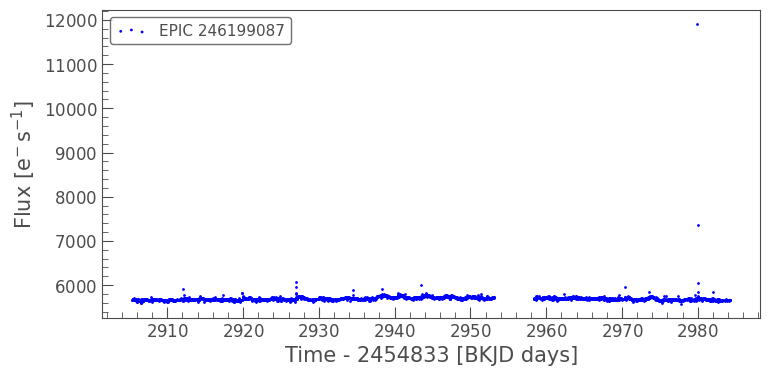

In [ ]:
# Remove noise
pixelfile.to_lightcurve(method="pld").plot(color='orange')
pixelfile.to_lightcurve(method="pld").scatter(color='blue')

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

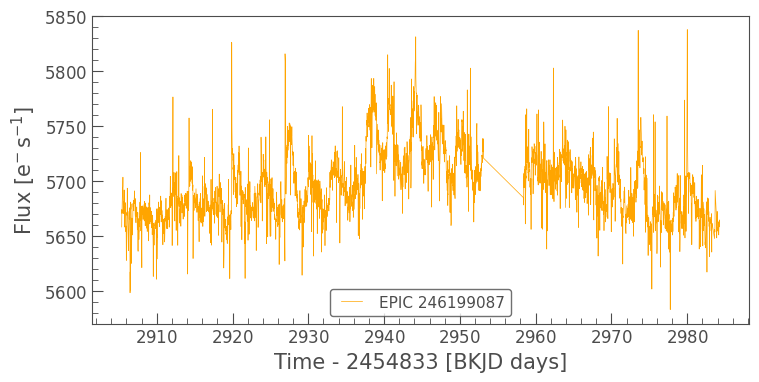

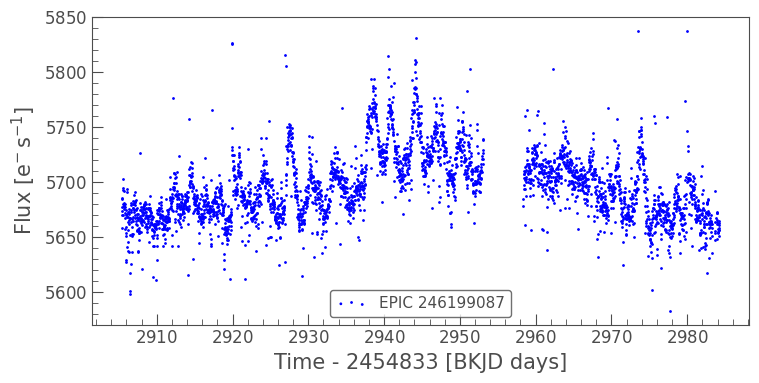

In [ ]:
# Remove outliers
pixelfile.to_lightcurve(method="pld").remove_outliers().plot(color='orange')
pixelfile.to_lightcurve(method="pld").remove_outliers().scatter(color='blue')

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

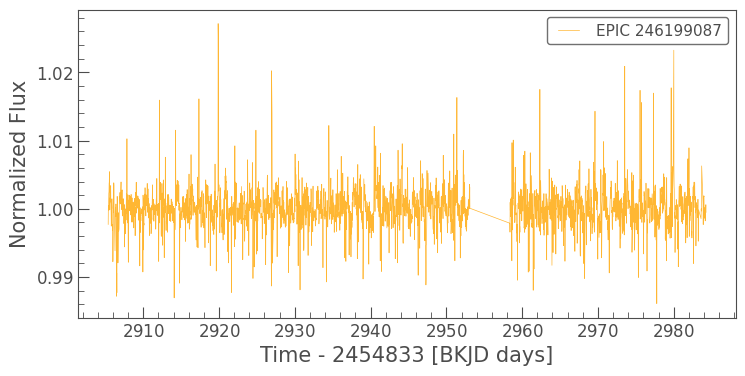

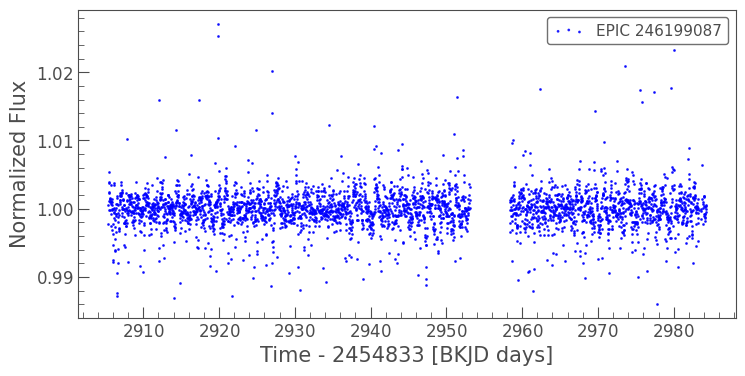

In [ ]:
# Normalize
pixelfile.to_lightcurve(method="pld").remove_outliers().flatten().plot(c='orange', alpha=.8)
pixelfile.to_lightcurve(method="pld").remove_outliers().flatten().scatter(c='b', alpha=.8)

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

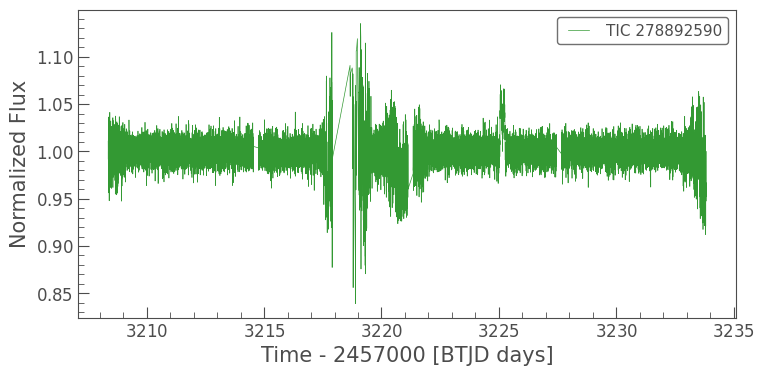

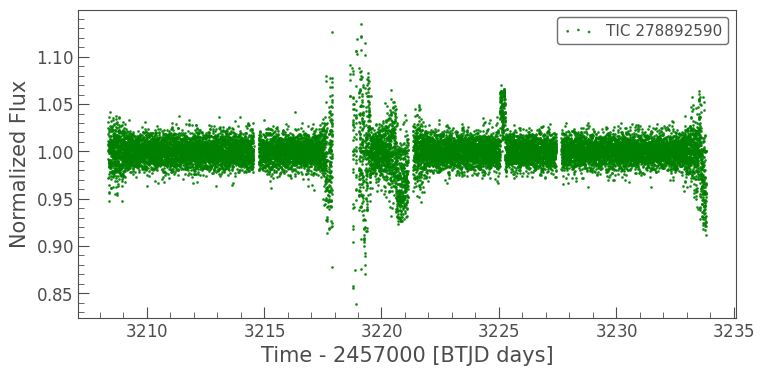

In [ ]:
# Compare with data from TESS (the other data is EPIC 246199087 whcih is from K2 | TIC 278892590 is from TESS)
pixelfile_info_tes.to_lightcurve(method="pld").remove_outliers().flatten().plot(c='green', alpha=.8)
pixelfile_info_tes.to_lightcurve(method="pld").remove_outliers().flatten().scatter(c='green', alpha=.8)

**Create and Analyse Periodogram**

<Axes: title={'center': 'Periodogram - Transit Detection'}, xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

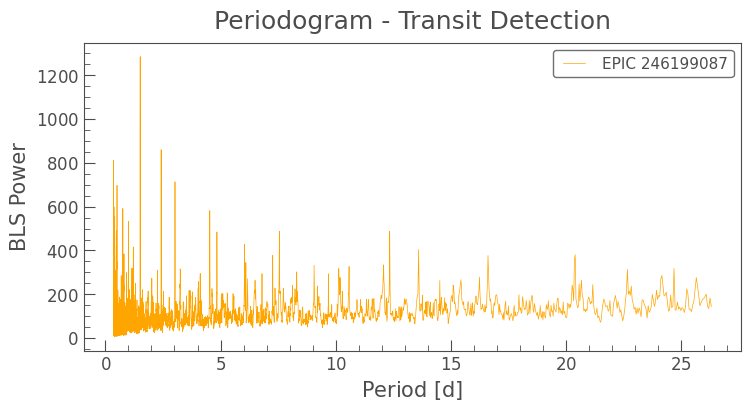

In [ ]:
# Create Periodogram for Transit Detection
periodogram = pixelfile.to_lightcurve(method="pld").remove_outliers().flatten()
periodogram.to_periodogram("bls").plot(title="Periodogram - Transit Detection", color='orange')

Period at max power: 1.5110372927644626 d


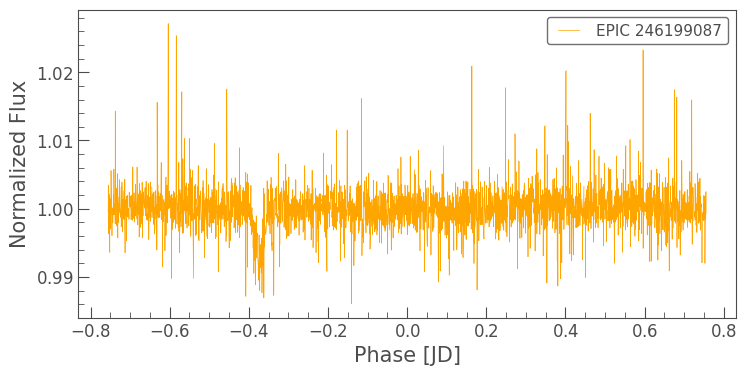

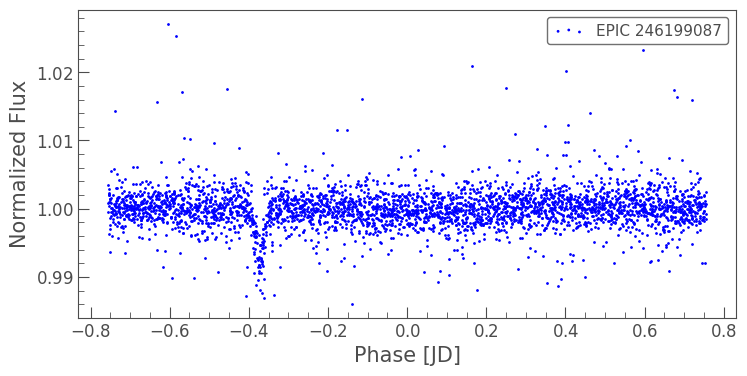

In [ ]:
# Normalize and get period at max power
period = periodogram.to_periodogram("bls").period_at_max_power
periodogram.fold(period).plot(color='orange')
periodogram.fold(period).scatter(color='blue')
print(f"Period at max power: {period}")

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

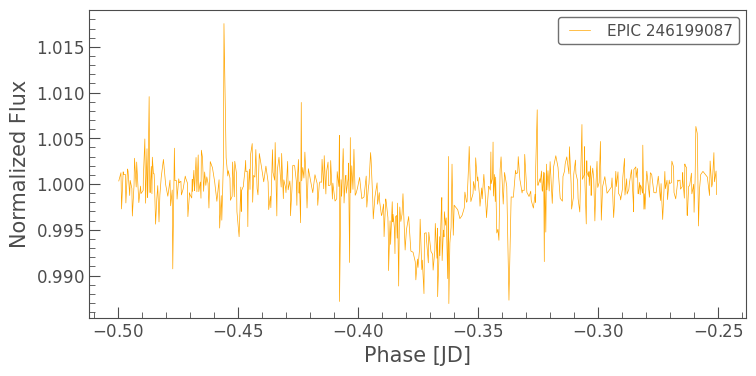

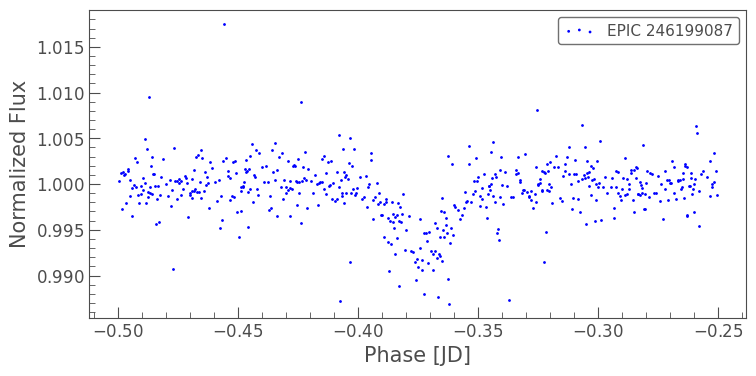

In [ ]:
# Zoom in and focus on dip in lightcurve (at x-axis)
periodogram.fold(period).truncate(-0.5, -0.25).plot(color='orange')
periodogram.fold(period).truncate(-0.5, -0.25).scatter(color='blue')

<Axes: title={'center': 'Periodogram - Transit Detection'}, xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

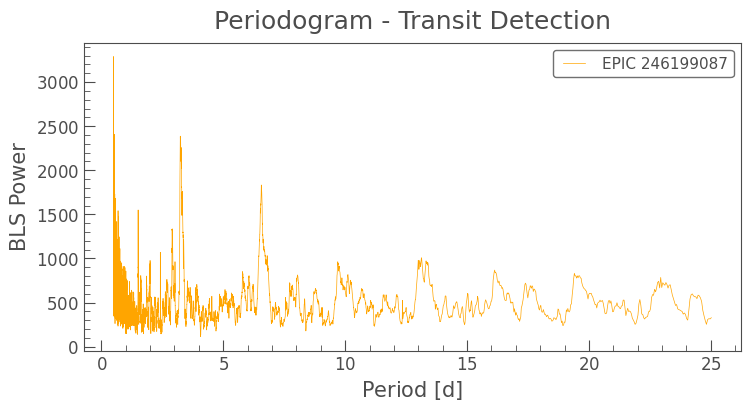

In [ ]:
# Clean the data by removing NaN values and flattening the curve
cleaned_lc = pixelfile.to_lightcurve(method="pld").remove_nans().flatten(window_length=401)

# Detect transits: Use a Box Least Squares (BLS) periodogram to find periodic dips in brightness, which could indicate planetary transits
periodogram = cleaned_lc.to_periodogram(method="bls", minimum_period=0.5, maximum_period=25)

# Plot the BLS periodogram to visualize detected periods (periodogram helps to visualize and extract the best-fit period, i.e. the time between transits
periodogram.plot(title="Periodogram - Transit Detection", color='orange')

In [ ]:
# Get the best-fit transit period and duration
best_fit_period = periodogram.period_at_max_power
best_fit_duration = periodogram.duration_at_max_power
best_fit_depth = periodogram.depth_at_max_power

print(f"Best-fit period: {best_fit_period:.2f} days")
print(f"Best-fit transit duration: {best_fit_duration:.2f} days")
print(f"Transit depth: {best_fit_depth:.6f} relative flux")

Best-fit period: 0.50 d days
Best-fit transit duration: 0.33 d days
Transit depth: 0.001514 relative flux


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

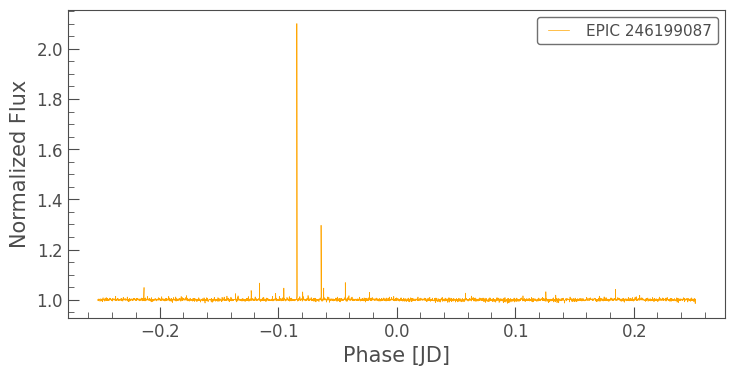

In [ ]:
# Generate "phase-folded light curve" by detected period to observe repeated transits more clearly ("fold" light curve data over a single period)
# This overlays all transit events on top of each other, allowing to clearly see recurring transit in one cycle
folded_lc = cleaned_lc.fold(period=best_fit_period.value)
folded_lc.plot(title=f"Folded Light Curve for {target} - Period: {best_fit_period:.2f} days", color='orange')

In [ ]:
# Estimate the planet radius (using transit depth and star's radius)
# Rp = planet radius, Rs = star radius, depth = fractional dip in brightness
star_radius = 1.065  # Solar radii for Kepler-10
planet_radius = star_radius * np.sqrt(best_fit_depth) # Formula: (Rp/Rs)^2 = depth
print(f"Estimated planet radius: {planet_radius:.2f} solar radii")

Estimated planet radius: 0.04 solar radii
